In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

In [19]:
#Load the data
file_path = "../assets/oecd_bli_2015.csv"
oecd_bli = pd.read_csv(file_path, thousands=",")
print(oecd_bli.head())

  LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total        PC  Percentage               0   
2       L   Value        TOT      Total        PC  Percentage               0   
3       L   Value        TOT      Total        PC  Percentage               0   
4       L   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Va

In [20]:
gdp_per_capita = pd.read_csv("../assets/gdp_per_capita.csv", thousands=",", delimiter="\t", encoding="latin1",
                             na_values="n/a")
print(gdp_per_capita.head())

               Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
3  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
4  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

        2015  Estimates Start After  
0    599.994                 2013.0 

In [49]:
#Prepare the data
def prepare_country_stats2(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns = "Indicator", values="Value")
    print(oecd_bli.head())
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    stats.sort_values(by="GDP per capita", inplace=True)
    stats.head()
    # TODO: Remove outliers and return stats
    return stats

country_stats = prepare_country_stats2(oecd_bli, gdp_per_capita)

x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]




Indicator  Air pollution  Assault rate  Consultation on rule-making  \
Country                                                               
Australia           13.0           2.1                         10.5   
Austria             27.0           3.4                          7.1   
Belgium             21.0           6.6                          4.5   
Brazil              18.0           7.9                          4.0   
Canada              15.0           1.3                         10.5   

Indicator  Dwellings without basic facilities  Educational attainment  \
Country                                                                 
Australia                                 1.1                    76.0   
Austria                                   1.0                    83.0   
Belgium                                   2.0                    72.0   
Brazil                                    6.7                    45.0   
Canada                                    0.2                   

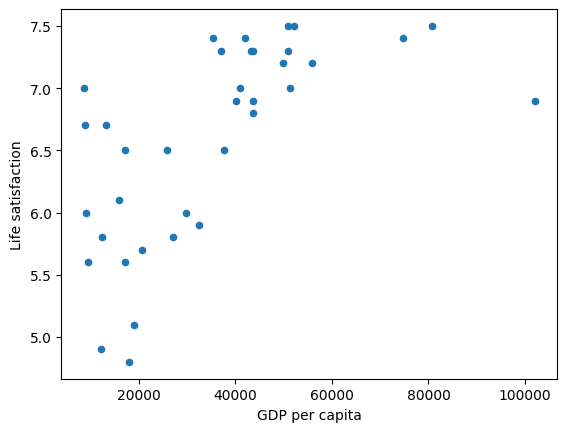

In [36]:
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

In [37]:
#Using Linear Regression Model

model = sklearn.linear_model.LinearRegression()
model.fit(x, y)
qatar_gdp = [[72000]]
print(model.predict(qatar_gdp))

[[7.43179813]]


In [38]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10)
model.fit(x,y)
qatar_gdp = [[72000]]
print(model.predict(qatar_gdp))

[[7.23]]
